In [1]:
# 사용할 데이터의 형태
data_type = '2'      # '1' : summarize X,개별 기사   '2' : summarize X,날짜별 기사
                    # '3' : summarize O,개별 기사   '4' : summarize O,날짜별 기사
normalized = 'done' # 'done' : 데이터 행별 normalize한 데이터     'not' : 데이터 행별 normalize 안한 데이터
erased_word = ''    # 제거된 단어 형태
num_word = '6000'   # 사용할 단어 수

# 돌려볼 모델의 구조
first_layer = 3000   # 모델의 첫 번째 레이어 수
second_layer = 1000  # 모델의 두 번째 레이어 수
ep = 300             # 모델의 에포크 수
ba = 1000            # 모델의 배치 사이즈

In [2]:
# 생성된 training, test의 x,y값을 pickle의 형태로 저장
import pickle
import os
path = os.getcwd()+'/pickles/'
if erased_word != '':
    erased_word = '_'+erased_word
with open(path+data_type+'train_x_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    train_x = pickle.load(f)
with open(path+data_type+'train_y_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    train_y = pickle.load(f)
with open(path+data_type+'train2_x_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    train2_x = pickle.load(f)
with open(path+data_type+'train2_y_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    train2_y = pickle.load(f)
with open(path+data_type+'test_x_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    test_x = pickle.load(f)
with open(path+data_type+'test_y_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    test_y = pickle.load(f)
with open(path+data_type+'test2_x_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    test2_x = pickle.load(f)
with open(path+data_type+'test2_y_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    test2_y = pickle.load(f)

In [3]:
# numpy 사용하여 float로 바꾸어주는 과정
import numpy as np
x_train = np.asarray(train_x).astype('float32')
y_train = np.asarray(train_y).astype('float32')
x_test = np.asarray(test_x).astype('float32')
y_test = np.asarray(test_y).astype('float32')

In [4]:
# DNN 학습 모델
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
#from tensorflow.keras.callbacks import EarlyStopping


#callbacks = [EarlyStopping(monitor='val_loss',patience = 20)]
model = models.Sequential()
n =len(x_train[0])
model.add(layers.Dense(first_layer,activation='relu'))#실제 쓸 단어갯수
model.add(layers.Dense(second_layer,activation='relu'))
model.add(layers.Dense(3,activation='softmax'))
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss = losses.categorical_crossentropy,metrics=[metrics.categorical_accuracy])

#hist = model.fit(x_train,y_train,epochs=ep,validation_data=(x_train2,y_train2),callbacks=callbacks,batch_size=ba, shuffle=True)
hist = model.fit(x_train,y_train,epochs=ep,validation_data=(x_test,y_test),batch_size=ba)


Epoch 1/300
1/1 [==============================] - 0s 374ms/step - loss: 1.0986 - categorical_accuracy: 0.3238 - val_loss: 1.0978 - val_categorical_accuracy: 0.3341
Epoch 2/300
1/1 [==============================] - 0s 173ms/step - loss: 1.0973 - categorical_accuracy: 0.3392 - val_loss: 1.1050 - val_categorical_accuracy: 0.3131
Epoch 3/300
1/1 [==============================] - 0s 168ms/step - loss: 1.1034 - categorical_accuracy: 0.3172 - val_loss: 1.0972 - val_categorical_accuracy: 0.3949
Epoch 4/300
1/1 [==============================] - 0s 182ms/step - loss: 1.0944 - categorical_accuracy: 0.4912 - val_loss: 1.0953 - val_categorical_accuracy: 0.3598
Epoch 5/300
1/1 [==============================] - 0s 173ms/step - loss: 1.0899 - categorical_accuracy: 0.3612 - val_loss: 1.1198 - val_categorical_accuracy: 0.3341
Epoch 6/300
1/1 [==============================] - 0s 176ms/step - loss: 1.1081 - categorical_accuracy: 0.3392 - val_loss: 1.0996 - val_categorical_accuracy: 0.3528
Epoch 7/30

1/1 [==============================] - 0s 180ms/step - loss: 0.7015 - categorical_accuracy: 0.7797 - val_loss: 1.0592 - val_categorical_accuracy: 0.4252
Epoch 51/300
1/1 [==============================] - 0s 173ms/step - loss: 0.6964 - categorical_accuracy: 0.6960 - val_loss: 1.1334 - val_categorical_accuracy: 0.4369
Epoch 52/300
1/1 [==============================] - 0s 169ms/step - loss: 0.7159 - categorical_accuracy: 0.7093 - val_loss: 1.0910 - val_categorical_accuracy: 0.3808
Epoch 53/300
1/1 [==============================] - 0s 223ms/step - loss: 0.7071 - categorical_accuracy: 0.6167 - val_loss: 1.1878 - val_categorical_accuracy: 0.4276
Epoch 54/300
1/1 [==============================] - 0s 155ms/step - loss: 0.7689 - categorical_accuracy: 0.6432 - val_loss: 1.2118 - val_categorical_accuracy: 0.3832
Epoch 55/300
1/1 [==============================] - 0s 198ms/step - loss: 0.7677 - categorical_accuracy: 0.6806 - val_loss: 1.2408 - val_categorical_accuracy: 0.3715
Epoch 56/300
1/1 

1/1 [==============================] - 0s 168ms/step - loss: 0.4697 - categorical_accuracy: 0.8062 - val_loss: 1.2994 - val_categorical_accuracy: 0.3715
Epoch 100/300
1/1 [==============================] - 0s 166ms/step - loss: 0.4559 - categorical_accuracy: 0.8238 - val_loss: 1.2346 - val_categorical_accuracy: 0.4720
Epoch 101/300
1/1 [==============================] - 0s 167ms/step - loss: 0.4973 - categorical_accuracy: 0.7841 - val_loss: 1.3337 - val_categorical_accuracy: 0.3715
Epoch 102/300
1/1 [==============================] - 0s 161ms/step - loss: 0.4531 - categorical_accuracy: 0.8260 - val_loss: 1.2308 - val_categorical_accuracy: 0.4650
Epoch 103/300
1/1 [==============================] - 0s 153ms/step - loss: 0.5258 - categorical_accuracy: 0.7621 - val_loss: 1.3321 - val_categorical_accuracy: 0.4229
Epoch 104/300
1/1 [==============================] - 0s 155ms/step - loss: 0.4806 - categorical_accuracy: 0.7996 - val_loss: 1.0993 - val_categorical_accuracy: 0.4603
Epoch 105/30

1/1 [==============================] - 0s 160ms/step - loss: 0.2161 - categorical_accuracy: 0.9515 - val_loss: 1.2994 - val_categorical_accuracy: 0.4393
Epoch 149/300
1/1 [==============================] - 0s 145ms/step - loss: 0.1970 - categorical_accuracy: 0.9581 - val_loss: 1.2476 - val_categorical_accuracy: 0.5140
Epoch 150/300
1/1 [==============================] - 0s 159ms/step - loss: 0.2155 - categorical_accuracy: 0.9427 - val_loss: 1.5116 - val_categorical_accuracy: 0.4065
Epoch 151/300
1/1 [==============================] - 0s 148ms/step - loss: 0.2559 - categorical_accuracy: 0.9251 - val_loss: 1.4603 - val_categorical_accuracy: 0.4790
Epoch 152/300
1/1 [==============================] - 0s 167ms/step - loss: 0.4108 - categorical_accuracy: 0.8172 - val_loss: 1.7508 - val_categorical_accuracy: 0.3972
Epoch 153/300
1/1 [==============================] - 0s 155ms/step - loss: 0.4732 - categorical_accuracy: 0.7819 - val_loss: 1.4322 - val_categorical_accuracy: 0.4790
Epoch 154/30

1/1 [==============================] - 0s 173ms/step - loss: 0.2149 - categorical_accuracy: 0.9185 - val_loss: 1.5589 - val_categorical_accuracy: 0.4533
Epoch 198/300
1/1 [==============================] - 0s 142ms/step - loss: 0.1325 - categorical_accuracy: 0.9714 - val_loss: 1.2041 - val_categorical_accuracy: 0.5140
Epoch 199/300
1/1 [==============================] - 0s 163ms/step - loss: 0.0793 - categorical_accuracy: 0.9956 - val_loss: 1.2784 - val_categorical_accuracy: 0.5374
Epoch 200/300
1/1 [==============================] - 0s 192ms/step - loss: 0.0540 - categorical_accuracy: 1.0000 - val_loss: 1.1845 - val_categorical_accuracy: 0.5561
Epoch 201/300
1/1 [==============================] - 0s 168ms/step - loss: 0.0465 - categorical_accuracy: 1.0000 - val_loss: 1.2108 - val_categorical_accuracy: 0.5444
Epoch 202/300
1/1 [==============================] - 0s 155ms/step - loss: 0.0446 - categorical_accuracy: 1.0000 - val_loss: 1.2040 - val_categorical_accuracy: 0.5537
Epoch 203/30

1/1 [==============================] - 0s 164ms/step - loss: 0.0175 - categorical_accuracy: 1.0000 - val_loss: 1.3005 - val_categorical_accuracy: 0.5561
Epoch 247/300
1/1 [==============================] - 0s 152ms/step - loss: 0.0172 - categorical_accuracy: 1.0000 - val_loss: 1.4310 - val_categorical_accuracy: 0.5514
Epoch 248/300
1/1 [==============================] - 0s 190ms/step - loss: 0.0173 - categorical_accuracy: 1.0000 - val_loss: 1.2945 - val_categorical_accuracy: 0.5280
Epoch 249/300
1/1 [==============================] - 0s 157ms/step - loss: 0.0186 - categorical_accuracy: 1.0000 - val_loss: 1.6528 - val_categorical_accuracy: 0.5117
Epoch 250/300
1/1 [==============================] - 0s 156ms/step - loss: 0.0284 - categorical_accuracy: 1.0000 - val_loss: 1.9965 - val_categorical_accuracy: 0.4136
Epoch 251/300
1/1 [==============================] - 0s 173ms/step - loss: 0.1952 - categorical_accuracy: 0.9053 - val_loss: 5.5103 - val_categorical_accuracy: 0.3598
Epoch 252/30

1/1 [==============================] - 0s 163ms/step - loss: 0.0097 - categorical_accuracy: 1.0000 - val_loss: 2.0946 - val_categorical_accuracy: 0.4673
Epoch 296/300
1/1 [==============================] - 0s 153ms/step - loss: 0.0427 - categorical_accuracy: 1.0000 - val_loss: 5.1669 - val_categorical_accuracy: 0.3575
Epoch 297/300
1/1 [==============================] - 0s 164ms/step - loss: 2.9418 - categorical_accuracy: 0.4581 - val_loss: 4.0573 - val_categorical_accuracy: 0.3925
Epoch 298/300
1/1 [==============================] - 0s 150ms/step - loss: 1.9266 - categorical_accuracy: 0.6696 - val_loss: 3.9996 - val_categorical_accuracy: 0.3248
Epoch 299/300
1/1 [==============================] - 0s 155ms/step - loss: 0.8233 - categorical_accuracy: 0.6145 - val_loss: 2.7433 - val_categorical_accuracy: 0.4930
Epoch 300/300
1/1 [==============================] - 0s 167ms/step - loss: 0.7865 - categorical_accuracy: 0.7555 - val_loss: 1.5078 - val_categorical_accuracy: 0.5164


In [5]:
# 모델의 예측값을 튜플로 반환하는 함수
def predict(x):
    data = np.expand_dims(np.asarray(x).astype('float32'),axis=0)
    result = model.predict(data)
    return tuple(result[0])

In [6]:
# 모든 날짜의 예측값들을 합치기 위한 튜플의 합 함수
def sum_tuple(a,b):
    return (a[0]+b[0],a[1]+b[1],a[2]+b[2])

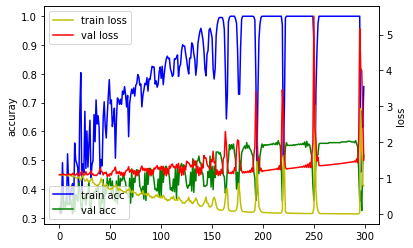

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, acc_ax = plt.subplots()

loss_ax = acc_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['categorical_accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_categorical_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [8]:
# Test set에 대한 예측 및 예측 정확도의 계산
import re

count = 0
sum_dic = {}
for data in train2_x:
    result = predict(data[0])
    if data[1] in sum_dic:
        sum_dic[data[1]] = sum_tuple(sum_dic[data[1]],result)
    else:
        sum_dic[data[1]] = result
    
for date in sum_dic:
    real = train2_y[date]
    value = sum_dic[date].index(max(sum_dic[date]))
    value -= 1
    if real == value:
        count = count + 1
train_score = count / len(sum_dic)

count = 0
sum_dic = {}
for data in test2_x:
    result = predict(data[0])
    if data[1] in sum_dic:
        sum_dic[data[1]] = sum_tuple(sum_dic[data[1]],result)
    else:
        sum_dic[data[1]] = result
    
for date in sum_dic:
    real = test2_y[date]
    value = sum_dic[date].index(max(sum_dic[date]))
    value -= 1
    if real == value:
        count = count + 1
test_score = count / len(sum_dic)

In [9]:
print('단어 갯수 : '+num_word)
print('모델 레이어 및 노드 수 : ','첫 번째 레이어 - relu,',first_layer,', 두 번째 레이어 - relu,',second_layer)
print('epochs : ',ep,', batch_size : ', ba)
print('train 데이터 정확도 : ', train_score)
print('test 데이터 정확도 : ', test_score)

단어 갯수 : 6000
모델 레이어 및 노드 수 :  첫 번째 레이어 - relu, 3000 , 두 번째 레이어 - relu, 1000
epochs :  300 , batch_size :  1000
train 데이터 정확도 :  1.0
test 데이터 정확도 :  0.5163551401869159
